# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [5]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [6]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제 시 그대로 실행 수정 X)
WORK_SPACE = "/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기"

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = WORK_SPACE
else :
  ROOT_PATH = os.path.abspath('..')
# Train 데이터 셋 경로
TRAIN_PATH = ROOT_PATH + "/train"
# MODEL 저장 경로
MODEL_PATH = ROOT_PATH + "/model"

### 3) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [7]:
# 필요 라이브러리 불러오기.
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Embedding
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

### 4) GPU 환경 확인하기
tensorflow가 GPU를 활용하고 있는지 확인하려면, tensorflow에서 제공하는 device_lib 라이브러리를 활용하면 됩니다.

In [ ]:
# GPU 환경 확인하기
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11006353849256672190
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2780438366487795000
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

---

# 1. ImageDataGenerator 생성하기
앞의 <font color="red">__'[study] 2.데이터전처리'__ </font>과정에서 사용하였던 ImageDataGenerator를 그대로 가져오시면 됩니다.

<font color="green">[실습문제]</font> 1. ImageDataGenerator 생성하기
+ 모델 검증을 위해 데이터를 train:validation(8:2)로 분할합니다.
+ 모델 성능 개선을 위해 데이터 증식(Data augmentation)이 필요 시 자유롭게 설정

In [ ]:
batch_size = 32
img_width = 320
img_height = 96

In [ ]:
# 실습해보세요.
train_datagen = ImageDataGenerator(
    rescale = 1. / 255.,
    validation_split = .2
)

# train_genrator 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='training',
    shuffle=True,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

# validation_generator 생성
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='validation',
    shuffle=True,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1970 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


---

# 2. 모델 구성하기
+ KeyPoint : 합성곱 신경망 (CNN) 모델 구성.

<font color="green">[실습문제]</font> 2. CNN 모델을 설계해 보세요.
* 케라스를 이용해서 CNN 모델을 설계합니다.

In [ ]:
# 실습해주세요.
keras.backend.clear_session()

model = Sequential([
# Conv2D, MaxPooling2D 조합으로 층을 쌓습니다. 첫번째 입력층의 input_shape은 imageDataGenerator target size로 지정합니다.
  Conv2D(input_shape=(320, 96, 3), filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
  MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

  Flatten(),
  Dense(4096, activation='relu'),
  Dense(4096, activation='relu'),
  Dense(4, activation='softmax')
])

In [ ]:
# 설계된 모델을 확인해보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 320, 96, 64)       1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 320, 96, 64)       36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 160, 48, 64)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 160, 48, 128)      73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 160, 48, 128)      147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 80, 24, 128)      0         
 2D)                                                    

<font color="green">[실습문제]</font> 3. 모델을 학습시켜 보세요.
* 위에서 설계한 모델에 데이터를 가지고 학습을 진행 합니다. 
* history 변수에 학습 결과를 입력 받습니다.
* callback 함수로 ModelCheckpoint와 EarlyStopping을 사용하세요.(best만 저장)
* 학습한 모델의 weight를 경로 MODEL_PATH 에 저장해주세요.
* val_loss 기준으로 모니터링 해주세요.

In [ ]:
# 실습해보세요.
# 모델 컴파일 
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['categorical_accuracy']
)

# checkpoint 
checkpoint = ModelCheckpoint(
  filepath=MODEL_PATH,
  monitor='val_loss',
  # verbose=1,
  save_best_only=True,
  save_weights_only=False
)

# early_stopping
early_stopping = EarlyStopping(
  monitor = 'val_loss',
  min_delta = 0,
  patience = 5,
  verbose = 1,
  restore_best_weights = True
)


In [ ]:
# 모델 학습
hist = model.fit(
  train_generator,
  validation_data=validation_generator,
  callbacks = [early_stopping, checkpoint],
  verbose = 1,
  epochs = 100
)


Epoch 1/100
62/62 [==============================] - 524s 8s/step - loss: 1.1072 - categorical_accuracy: 0.4777 - val_loss: 0.9839 - val_categorical_accuracy: 0.5122
Epoch 2/100
62/62 [==============================] - 27s 441ms/step - loss: 0.9756 - categorical_accuracy: 0.5122 - val_loss: 0.9806 - val_categorical_accuracy: 0.5122
Epoch 3/100
62/62 [==============================] - 26s 421ms/step - loss: 0.9733 - categorical_accuracy: 0.5122 - val_loss: 0.9729 - val_categorical_accuracy: 0.5122
Epoch 4/100
62/62 [==============================] - 19s 310ms/step - loss: 0.9747 - categorical_accuracy: 0.5056 - val_loss: 0.9795 - val_categorical_accuracy: 0.5122
Epoch 5/100
62/62 [==============================] - 18s 295ms/step - loss: 0.9738 - categorical_accuracy: 0.5122 - val_loss: 0.9792 - val_categorical_accuracy: 0.5122
Epoch 6/100
62/62 [==============================] - 25s 399ms/step - loss: 0.9728 - categorical_accuracy: 0.5122 - val_loss: 0.9683 - val_categorical_accuracy: 0

<font color="green">[실습문제]</font> 4. 모델 저장하기 
* 만들어진 모델를 기반으로 모델파일로 저장해주세요.
* 파일 저장 전에 ModelCheckpoint의 가중치(weights)를 로딩해주세요.
* 저장위치는 MODEL_PATH 입니다.
* 파일명은 <font color="red">[개인] 미니프로젝트3차_A000000_OOO.h5</font>

><font color="red">[Hint]</font><br>
>모델 가중치는 load_weight 매소드로 불러옵니다.<br>
>모델 저장시에는 model.save 매소드를 사용합니다. 

In [ ]:
# 실습해보세요.
model.load_weights(MODEL_PATH)
model.save(MODEL_PATH + '/[개인]미니프로젝트3차_A024142_옥수빈.h5')

---

# 3. 모델 평가하기

<font color="green">[실습문제]</font> 5. 훈련 과정에서 epoch에 따른 정확도와 손실을 시각화화여 확인합니다.

In [ ]:
# 실습해보세요.
import matplotlib.pyplot as plt
%matplotlib inline

train_acc = hist.history["categorical_accuracy"]
val_acc = hist.history['val_categorical_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

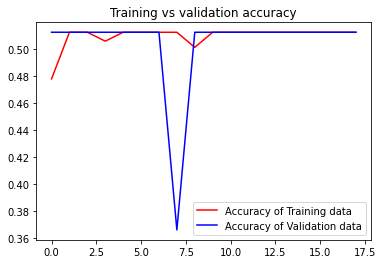

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(train_acc))
plt.plot(epochs, train_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, val_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

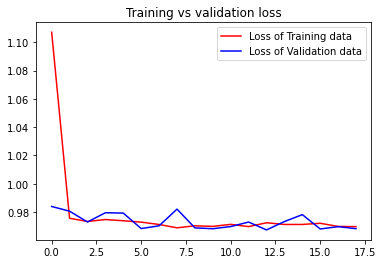

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, 'r', label='Loss of Training data')
plt.plot(epochs, val_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

<font color="green">[실습문제]</font> 6. validation 데이터를 기준으로 학습한 모델을 적용해서 f1 Score를 계산하세요.

* <font color="red">hint.</font> sklearn.metrics 패키지에서 f1_score를 사용하세요.

In [ ]:
# 실습해보세요.
from sklearn.metrics import f1_score

y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
scr = f1_score(validation_generator.labels, y_pred, average='micro')

print(f'F1 Score: {scr:.3f}')


F1 Score: 0.512


---

## [추가학습] 모델 비교하기 
_시간이 남으면 해보세요._

<font color="green">[실습문제]</font> 7. 모델 구조를 변경해 보거나 다른 모델들을 만들어 보고 성능을 비교해 최고의 모델을 만들어 보세요.
- 여러분들이 배운 모델들을 다양하게 만들어 보고 성능을 비교해 보세요.
- ImageDataGenerator를 변경하면 성능 개선도 가능합니다. 

In [8]:
batch_size = 32
img_width = 480
img_height = 854

In [9]:
# 실습해보세요.
train_datagen = ImageDataGenerator(
    rescale = 1. / 255.,
    validation_split = .2
)

# train_genrator 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='training',
    shuffle=True,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

# validation_generator 생성
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    subset='validation',
    shuffle=True,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1970 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [23]:
keras.backend.clear_session()

# 2. 모델 발판 생성
model = Sequential()

# 3. 레이어 블록 조립
model.add( Input(shape=(480, 854, 3)) )
model.add( keras.layers.Cropping2D(cropping=((35, 53), (115, 230))) )
model.add( Conv2D(filters=32,           # feature map의 수
                  kernel_size=(3,3),    # filter size
                  strides=(1,1),        # 훑는 방식 결정
                  padding='same',       # 0을 덧댄다
                  activation='relu') )  # activation 주의!

model.add( Conv2D(filters=32,         
                  kernel_size=(3,3),    
                  strides=(1,1),       
                  padding='same',      
                  activation='relu') )  

model.add( MaxPool2D(pool_size=(2,2)) ) # feature map 사이즈 절반으로 줄이기! <- (2,2)의 값 중 가장 높은 것으로
model.add( keras.layers.BatchNormalization() )       # 모델 학습에 유용한 레이어
model.add( Dropout(0.2) )               # 학습 과정에서 노드 일부를 일부러 제외한다

model.add( Conv2D(filters=64,           
                  kernel_size=(3,3),    
                  strides=(1,1),      
                  padding='same',       
                  activation='relu') )  
model.add( Conv2D(filters=64,           
                  kernel_size=(3,3),    
                  strides=(1,1),        
                  padding='same',       
                  activation='relu') ) 

model.add( MaxPool2D(pool_size=(2,2)) )
model.add( keras.layers.BatchNormalization() )       
model.add( Dropout(0.2) )

model.add( Flatten() )
model.add( Dense(128, activation='relu') )
model.add( Dense(4, activation='softmax') )

# 4. 컴파일
model.compile(loss="categorical_crossentropy", metrics=['accuracy'],
              optimizer='adam')

# 요약
# model.summary()

In [11]:
# checkpoint 
checkpoint = ModelCheckpoint(
  filepath=MODEL_PATH,
  monitor='val_loss',
  # verbose=1,
  save_best_only=True,
  save_weights_only=False
)

# early_stopping
early_stopping = EarlyStopping(
  monitor = 'val_loss',
  min_delta = 0,
  patience = 5,
  verbose = 1,
  restore_best_weights = True
)


In [24]:
# 모델 학습
hist = model.fit(
  train_generator,
  validation_data=validation_generator,
  # callbacks = [early_stopping],
  verbose = 1,
  epochs = 20
)


Epoch 1/20
62/62 [==============================] - 35s 526ms/step - loss: 11.1152 - accuracy: 0.8030 - val_loss: 27.1543 - val_accuracy: 0.3659
Epoch 2/20
62/62 [==============================] - 30s 475ms/step - loss: 0.0233 - accuracy: 0.9959 - val_loss: 37.4903 - val_accuracy: 0.3659
Epoch 3/20
62/62 [==============================] - 30s 486ms/step - loss: 0.0150 - accuracy: 0.9980 - val_loss: 34.7781 - val_accuracy: 0.3659
Epoch 4/20
62/62 [==============================] - 30s 479ms/step - loss: 1.4001e-04 - accuracy: 1.0000 - val_loss: 25.8926 - val_accuracy: 0.3659
Epoch 5/20
62/62 [==============================] - 30s 477ms/step - loss: 2.5000e-07 - accuracy: 1.0000 - val_loss: 18.6116 - val_accuracy: 0.3740
Epoch 6/20
62/62 [==============================] - 29s 472ms/step - loss: 9.5521e-06 - accuracy: 1.0000 - val_loss: 8.5243 - val_accuracy: 0.4776
Epoch 7/20
62/62 [==============================] - 29s 471ms/step - loss: 2.6248e-07 - accuracy: 1.0000 - val_loss: 1.3516 

In [25]:
TEST_PATH = ROOT_PATH + "/test"
# 테스트 영상 test.mp4 경로 

TEST_VIDEO = TEST_PATH + "/test.mp4"

# 모델 예측을 위해 테스트 영상을 프레임 이미지로 자르고 저장하는 경로 (testGenerator 생성 시 PATH )   
TEST_IMAGE = TEST_PATH + "/image"

# 모델(.h5) 파일이 저장된 경로 (본인이 생성한 모델)
MODEL_PATH = ROOT_PATH + "/model"

In [26]:
datagen = ImageDataGenerator(rescale = 1. / 255.)
test_generator = datagen.flow_from_directory(
      TEST_PATH,
      target_size = (img_width, img_height),
      batch_size = batch_size,
      class_mode = 'categorical'
  )

Found 1220 images belonging to 1 classes.


In [31]:
classes = pd.Series({0: 'jung', 1: 'park', 2: 'sam', 3: 'sayuri'})

test_generator.reset()
pred = model.predict(test_generator)
pred = np.argmax(pred, axis=1)
fn = test_generator.filenames
filename = [os.path.splitext(os.path.basename(x))[0] for x in fn]

predict_df = pd.DataFrame({
    'filename': filename,
    'y_pred': pred
})

In [32]:
predict_df['y_pred'] = predict_df['y_pred'].map(classes)
predict_df['filename'] = predict_df['filename'].astype('int')
predict_df.sort_values(by='filename', ignore_index=True, inplace=True)
predict_df['filename'] = pd.to_datetime(predict_df['filename'], unit='s')
predict_df['filename'] = predict_df['filename'].dt.time

st = predict_df.groupby(by='y_pred', as_index=False)[['filename']].min()
st.columns = ['corner', 'start_time']
end = predict_df.groupby(by='y_pred', as_index=False)[['filename']].max()
end.columns = ['corner', 'end_time']

predict_df = pd.merge(st, end)

In [33]:
predict_df

,corner,start_time,end_time
0,jung,00:00:06,00:20:17
1,park,00:00:00,00:20:19
2,sam,00:00:01,00:20:15


In [34]:
model.evaluate(test_generator)

39/39 [==============================] - 15s 379ms/step - loss: 516.6287 - accuracy: 0.3787


[516.628662109375, 0.3786885142326355]